## Import Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [138]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## Loading and Checking the Data

In [140]:
# This command tells python to remember a main folder path
path = r'/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data'

In [141]:
# simplify the import function
data_cleaned = pd.read_csv(os.path.join(path, 'prepared.csv'), index_col = False)

In [142]:
# Checking the dataset is correctly loaded
print(data_cleaned.head())
print(data_cleaned.info())
data_cleaned.shape

   Unnamed: 0  incident_id        date           state city_or_county  \
0           0       461105  2013-01-01    Pennsylvania     Mckeesport   
1           1       460726  2013-01-01      California      Hawthorne   
2           2       478855  2013-01-01            Ohio         Lorain   
3           3       478925  2013-01-05        Colorado         Aurora   
4           4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street       0.0        3.0   
1               13500 block of Cerise Avenue       1.0        3.0   
2                      1776 East 28th Street       1.0        3.0   
3           16000 block of East Ithaca Place       2.0        0.0   
4                  307 Mourning Dove Terrace       2.0        2.0   

   congressional_district              gun_stolen  ... longitude  \
0                    14.0                     NaN  ...  -79.8559   
1         

(239677, 22)

In [143]:
data_cleaned.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'year'],
      dtype='object')

## Data Cleaning, Manipulations, and Reprocessing

In [145]:
# Select relevant features for clustering
features = data_cleaned[['n_killed', 'n_injured']]

In [146]:
# Verify selection
print(features.head())

   n_killed  n_injured
0       0.0        3.0
1       1.0        3.0
2       1.0        3.0
3       2.0        0.0
4       2.0        2.0


### 2a: Remove Categorical Columns

#### Since the k-means algorithm can only handle numerical variables, we need to remove categorical columns:

In [149]:
# Remove categorical columns
numerical_data = data_cleaned[['n_killed', 'n_injured', 'congressional_district', 'n_guns_involved','state_house_district', 'state_senate_district']]
#data_cleaned.select_dtypes(include=[np.number])

# Display the first few rows of the numerical data
numerical_data.head()

,n_killed,n_injured,congressional_district,n_guns_involved,state_house_district,state_senate_district
0,0.0,3.0,14.0,1.372442,55.447132,20.47711
1,1.0,3.0,43.0,1.372442,62.000000,35.00000
2,1.0,3.0,9.0,2.000000,56.000000,13.00000
3,2.0,0.0,6.0,1.372442,40.000000,28.00000
4,2.0,2.0,6.0,2.000000,62.000000,27.00000


In [193]:
numerical_data.describe()

,n_killed,n_injured,congressional_district,n_guns_involved,state_house_district,state_senate_district,Cluster
count,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,0.247199,0.484460,8.001265,1.372442,55.447132,20.477110,0.703251
std,0.480836,0.662355,8.266818,3.578322,38.497149,13.211681,0.456826
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,27.000000,10.000000,0.000000
50%,0.000000,0.000000,5.000000,1.000000,55.447132,20.477110,1.000000
75%,0.000000,1.000000,10.000000,1.372442,77.000000,29.000000,1.000000
max,2.000000,3.000000,53.000000,400.000000,901.000000,94.000000,1.000000


## 3. The Elbow Technique

#### To determine the optimal number of clusters, we use the elbow technique:

In [155]:
# stipulates the number of clusters to be used/ looked for 
num_cl = range(1,10)
# tries to find the best KMeans model for the number of clusters stipulated for each iteration
kmeans = [KMeans(n_clusters = i) for i in num_cl]

# creates a score list, which has scored every number of cluster in KMeans model
score = [kmeans[i].set_params(n_init=10).fit(numerical_data).score(numerical_data) for i in range(len(kmeans))]
# print list of scores for each iteration of KMean
score

[-416651223.37936485,
 -195052369.2170866,
 -126210327.4889473,
 -99334750.94899672,
 -78363113.68633913,
 -68866677.27488016,
 -59457337.74486402,
 -52957308.0589154,
 -46968349.34957638]

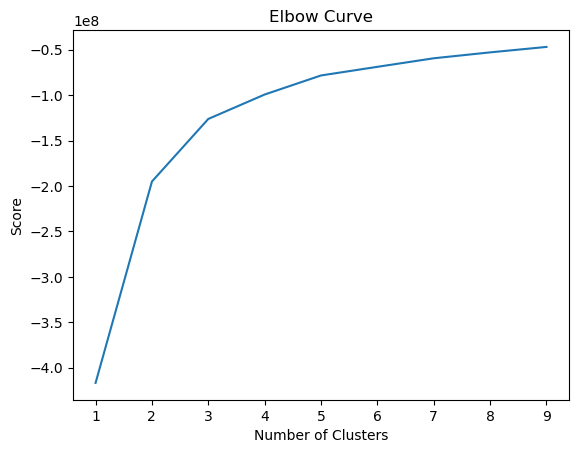

In [156]:
# plots the scores for each iteration, with varying number of clusters
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Determine the Optimal Number of Clusters

#### Based on the elbow plot, decide on the optimal number of clusters:

##### Based on the elbow plot, I chose the optimal number of clusters to be 4. This is where the SSE starts to flatten out, indicating that adding more clusters does not significantly improve the model.

## 5. Run the K-Means Algorithm

#### Run the k-means algorithm with the chosen number of clusters:

In [176]:
# Run K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=2) #random_state=42)
kmeans.fit(numerical_data)

# Attach the resulting clusters to the original dataframe
numerical_data['Cluster'] = kmeans.fit_predict(numerical_data)
numerical_data['Cluster'].value_counts()


/var/folders/ld/rygzx5nj4x3ddd2l1z5rj3m80000gn/T/ipykernel_71217/2687450260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Cluster'] = kmeans.fit_predict(numerical_data)


Cluster
1    168553
0     71124
Name: count, dtype: int64

## 6. Create Visualizations of the Clustered Data

#### Create scatter plots to visualie the clusters: 

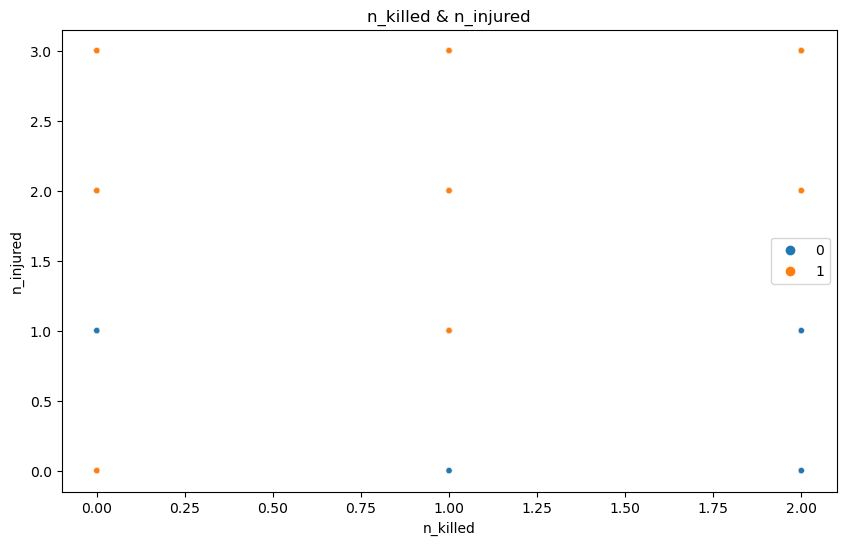

In [178]:
# Scatter plot of two numerical variables colored by cluster
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=numerical_data['n_killed'], y=numerical_data['n_injured'], hue=kmeans.labels_, s=20)
plt.title('n_killed & n_injured')
plt.xlabel('n_killed')
plt.ylabel('n_injured')
ax.grid(False)
plt.savefig('/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data/kill_inj.png')
plt.show()

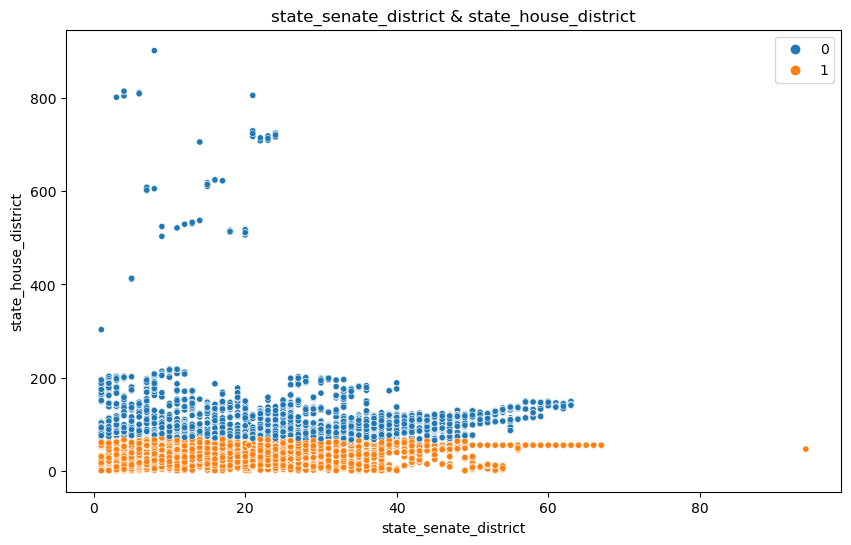

In [180]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=numerical_data['state_senate_district'], y=numerical_data['state_house_district'], hue=kmeans.labels_, s=20)
plt.title('state_senate_district & state_house_district')
plt.xlabel('state_senate_district')
plt.ylabel('state_house_district')
ax.grid(False)
plt.savefig('/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data/state_state.png')
plt.show()

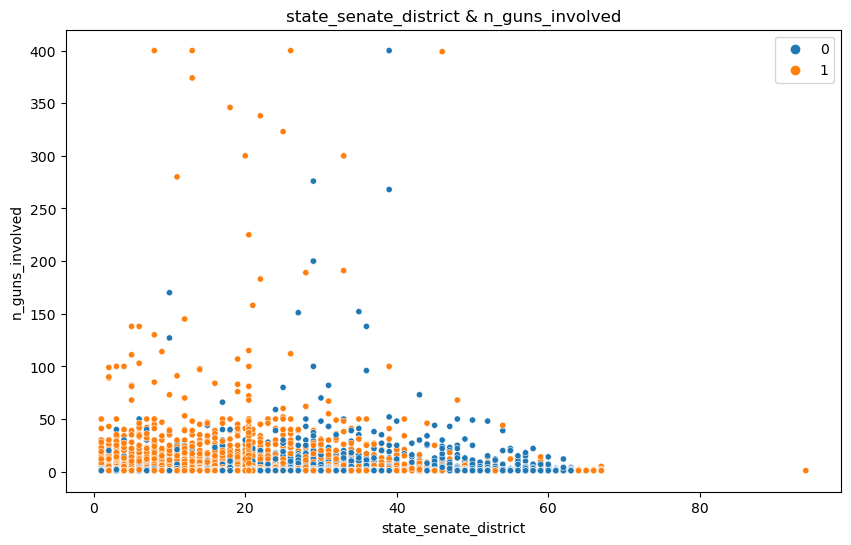

In [182]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=numerical_data['state_senate_district'], y=numerical_data['n_guns_involved'], hue=kmeans.labels_, s=20)
plt.title('state_senate_district & n_guns_involved')
plt.xlabel('state_senate_district')
plt.ylabel('n_guns_involved')
ax.grid(False)
plt.savefig('/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data/state_ngun.png')
plt.show()

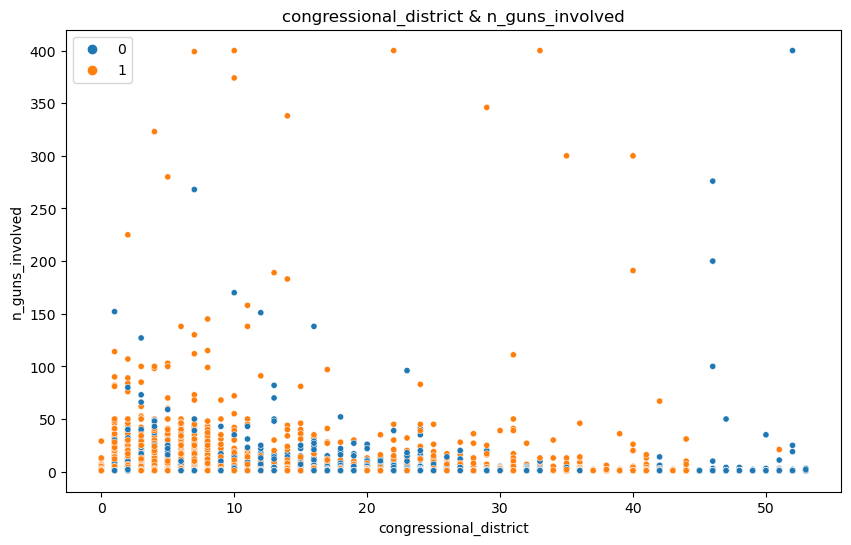

In [184]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=numerical_data['congressional_district'], y=numerical_data['n_guns_involved'], hue=kmeans.labels_, s=20)
plt.title('congressional_district & n_guns_involved')
plt.xlabel('congressional_district')
plt.ylabel('n_guns_involved')
ax.grid(False)
plt.savefig('/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data/cng_ngun.png')
plt.show()

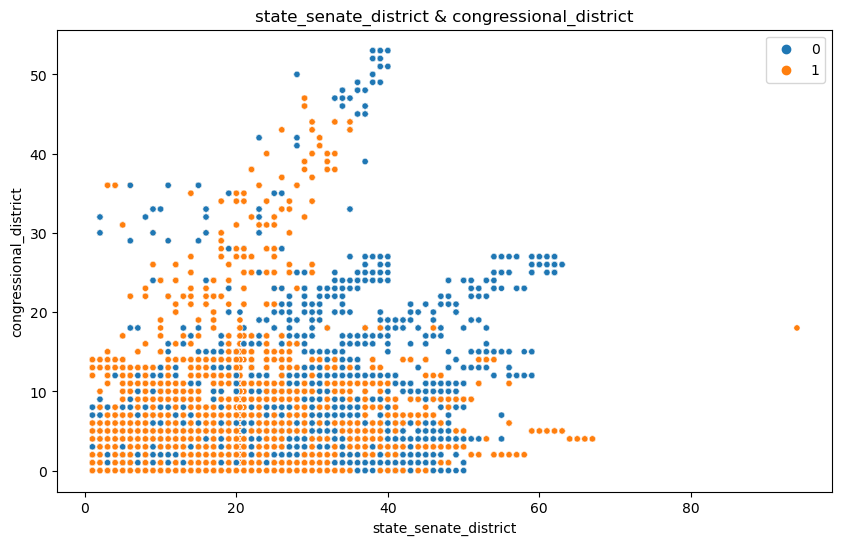

In [186]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=numerical_data['state_senate_district'], y=numerical_data['congressional_district'], hue=kmeans.labels_, s=20)
plt.title('state_senate_district & congressional_district')
plt.xlabel('state_senate_district')
plt.ylabel('congressional_district')
ax.grid(False)
plt.savefig('/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data/state_cng.png')
plt.show()

## 7. Discuss the Clusters

##### The scatter plot shows distinct clusters of gun violence incidents based on the number of people killed and injured. The clusters make sense as they group incidents with similar characteristics together. Further analysis can help understand the underlying factors contributing to each cluster.


## Calculate Descriptive Statistics

#### Calculate descriptive statistics for each cluster:

In [190]:
# Calculate descriptive statistics for each cluster
cluster_stats = numerical_data.groupby('Cluster').agg(['count', 'mean', 'std'])
cluster_stats

n_killed                     n_injured                      \
           count      mean       std     count      mean       std   
Cluster                                                              
0          71124  0.240847  0.476849     71124  0.479051  0.659666   
1         168553  0.249880  0.482485    168553  0.486743  0.663476   

        congressional_district                       n_guns_involved  \
                         count       mean        std           count   
Cluster                                                                
0                        71124  10.485757  10.064200           71124   
1                       168553   6.952888   7.122784          168553   

                            state_house_district                         \
             mean       std                count        mean        std   
Cluster                                                                   
0        1.357872  3.087174                71124  101.635594  32.013233   
1        1.378589  3.766397               168553   35.957071  19.871300   

        state_senate_district                        
                        count       mean        std  
Cluster                                              
0                       71124  27.656935  15.313690  
1                      168553  17.447453  10.877358

## 8 Discuss Findings and Propose Future Steps

##### The descriptive statistics reveal significant differences between clusters. For instance, one cluster might represent incidents with a high number of casualties, while another cluster represents incidents with minimal casualties.

##### These results could be useful for targeted interventions and resource allocation. For example, high-casualty clusters might indicate areas that require more stringent gun control measures or emergency response improvements. Understanding the characteristics of each cluster can help policymakers design more effective strategies to reduce gun violence.
